In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv'
crime = pd.read_csv(url)
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [3]:
crime.shape

(55, 12)

In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year                55 non-null     int64
 1   Population          55 non-null     int64
 2   Total               55 non-null     int64
 3   Violent             55 non-null     int64
 4   Property            55 non-null     int64
 5   Murder              55 non-null     int64
 6   Forcible_Rape       55 non-null     int64
 7   Robbery             55 non-null     int64
 8   Aggravated_assault  55 non-null     int64
 9   Burglary            55 non-null     int64
 10  Larceny_Theft       55 non-null     int64
 11  Vehicle_Theft       55 non-null     int64
dtypes: int64(12)
memory usage: 5.3 KB


In [5]:
crime['dt_year'] = pd.to_datetime(crime.Year, format='%Y')

In [6]:
del crime['Total']

In [7]:
crime['Decade'] = crime.Year // 10
crime.head()

,Year,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft,dt_year,Decade
0,1960,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200,1960-01-01,196
1,1961,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000,1961-01-01,196
2,1962,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800,1962-01-01,196
3,1963,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300,1963-01-01,196
4,1964,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800,1964-01-01,196


In [8]:
cs = crime.loc[:, 'Violent': 'Vehicle_Theft'].columns
cs

Index(['Violent', 'Property', 'Murder', 'Forcible_Rape', 'Robbery',
       'Aggravated_assault', 'Burglary', 'Larceny_Theft', 'Vehicle_Theft'],
      dtype='object')

In [9]:
agg = {c: 'sum' for c in cs}
agg['Population'] = 'last'
agg['Year'] = 'size'
gb = crime.groupby('Decade').agg(agg)
gb

,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft,Population,Year
Decade,,,,,,,,,,,
196,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100,201385000,10
197,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900,220099000,10
198,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411,248239000,10
199,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418,272690813,10
200,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834,307006550,10
201,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080,318857056,5


In [11]:
trends = gb.loc[:, 'Violent':'Vehicle_Theft'].div(gb.Year*gb.Population, 'rows')

<Axes: xlabel='Decade'>

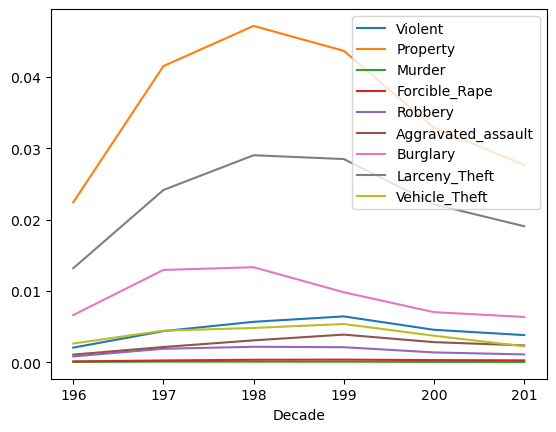

In [12]:
trends.plot()